In [2]:
# Import all necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make tables easier to read
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Better plot style
sns.set(style="whitegrid")


In [3]:
# Load the main transaction dataset
df = pd.read_csv("../data/raw/data.csv")

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.00,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.00,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.00,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Check data types, row count, and memory usage
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Summary statistics for numeric + categorical columns
df.describe(include="all")


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.00,95662,95662,95662,95662,95662.00,95662.00,95662,95662.00,95662.00
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,6717.85,9900.58,NaN,2.26,0.00
std,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,123306.80,123122.09,NaN,0.73,0.04
min,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,-1000000.00,2.00,NaN,0.00,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,-50.00,275.00,NaN,2.00,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,1000.00,1000.00,NaN,2.00,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,2800.00,5000.00,NaN,2.00,0.00


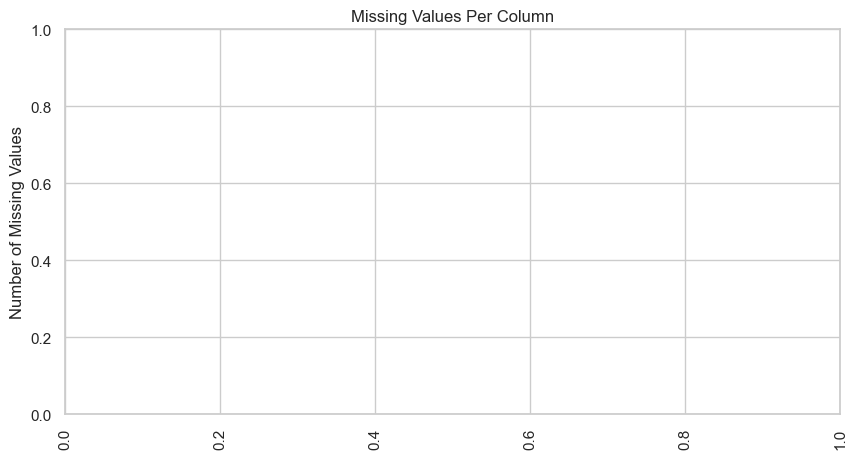

In [10]:
# Count missing values in each column
missing = df.isnull().sum().sort_values(ascending=False)
missing
# Visualize missing values (columns with at least 1 missing entry)


missing_nonzero = missing[missing > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_nonzero.index, y=missing_nonzero.values)
plt.xticks(rotation=90)
plt.title("Missing Values Per Column")
plt.ylabel("Number of Missing Values")
plt.show()



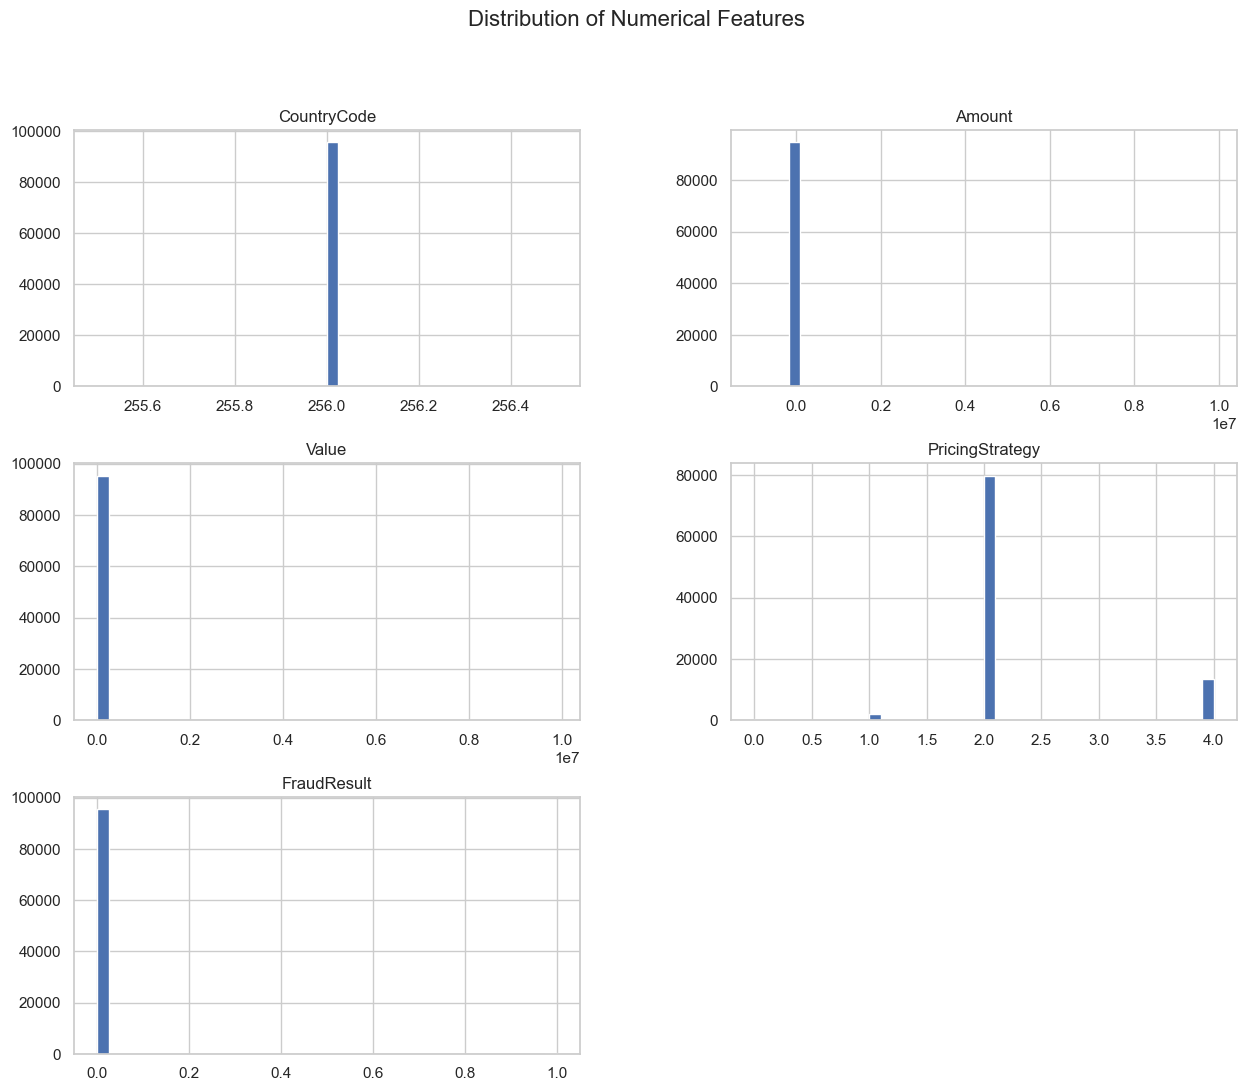

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for ALL numeric variables
df[numeric_cols].hist(figsize=(15, 12), bins=40)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()



✔ Amount is usually very skewed → Many small purchases + few large ones
✔ FraudResult is binary → imbalance likely
✔ TransactionId-like fields are NOT useful for modeling

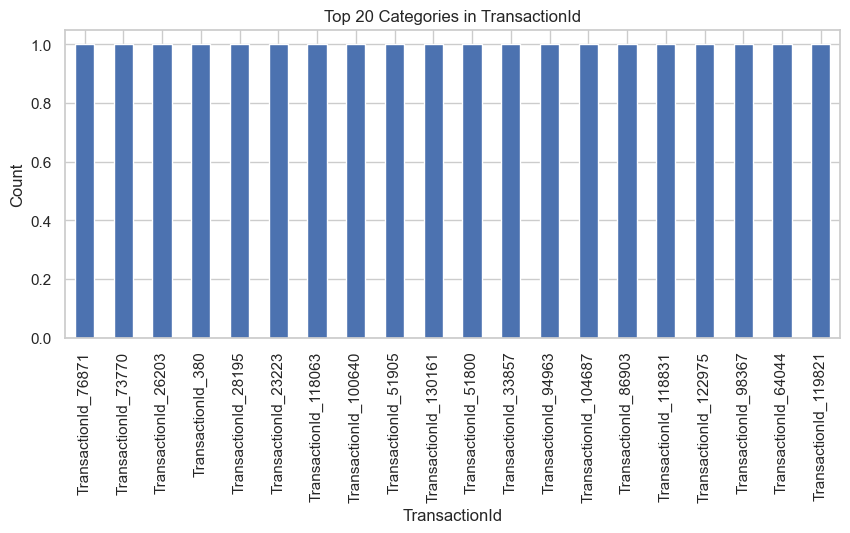

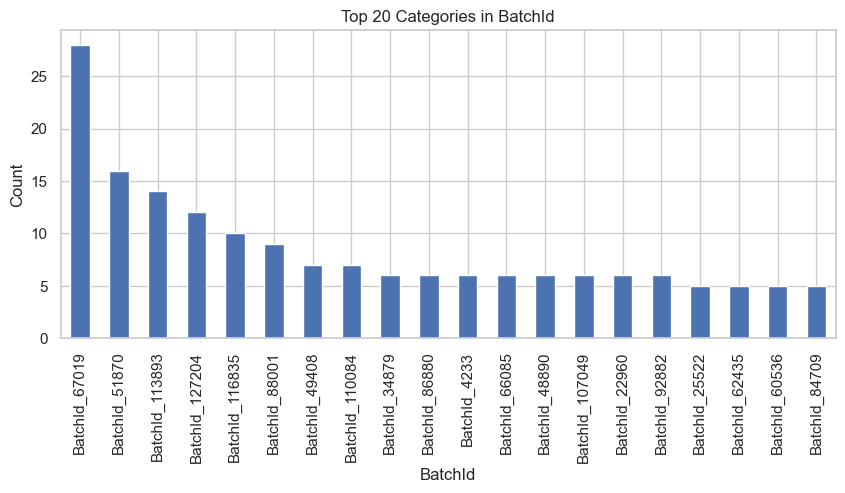

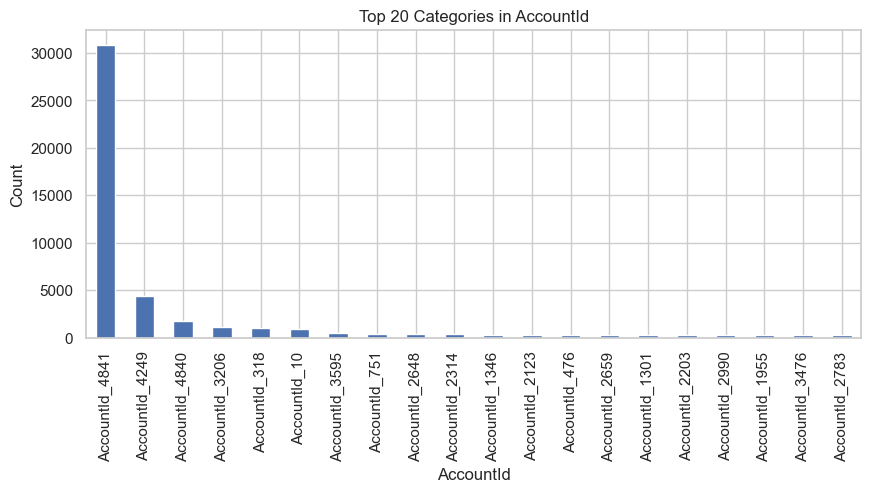

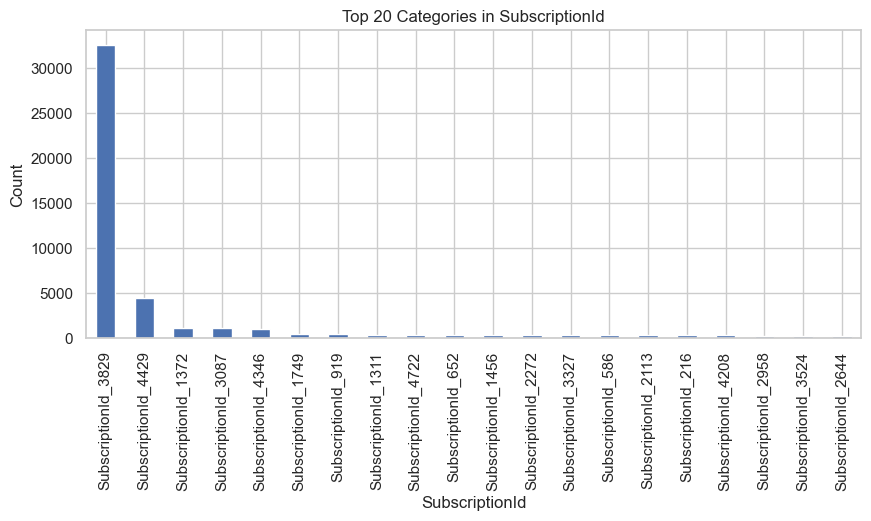

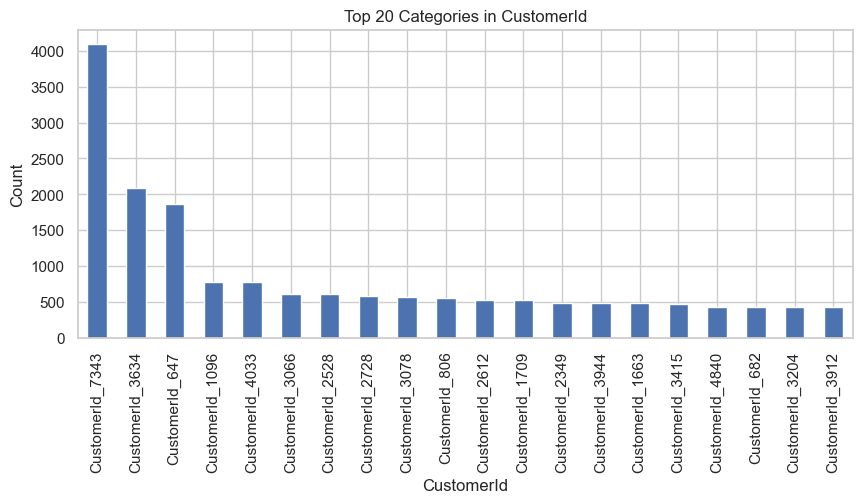

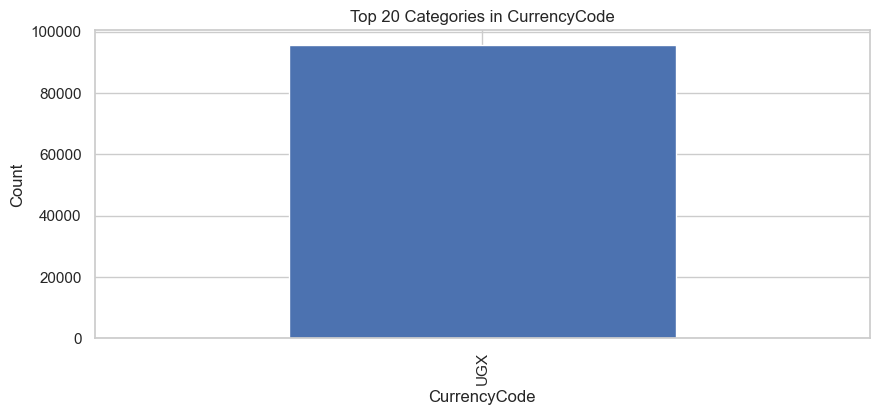

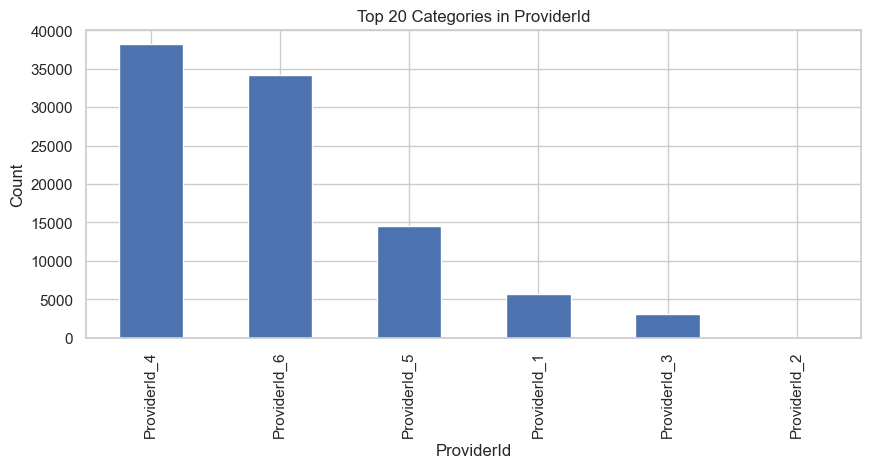

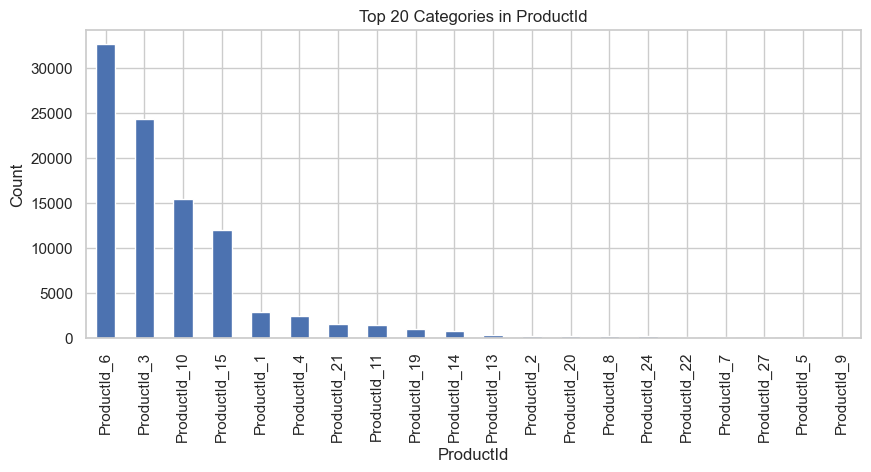

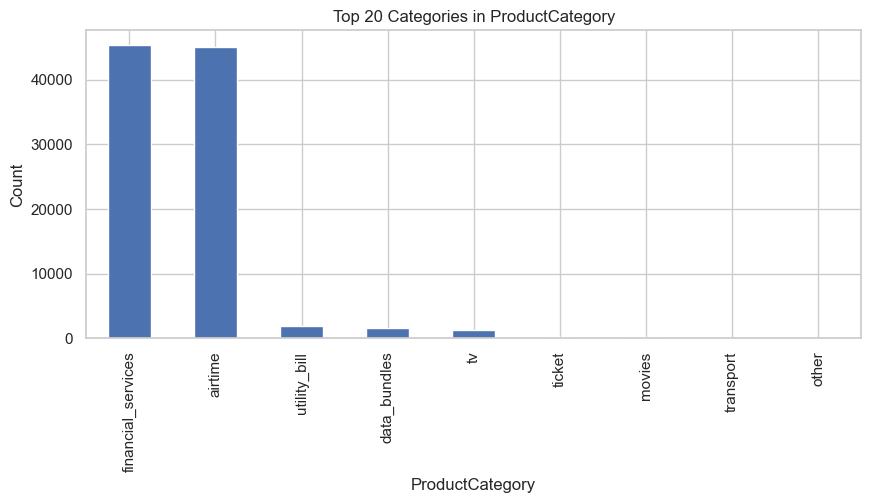

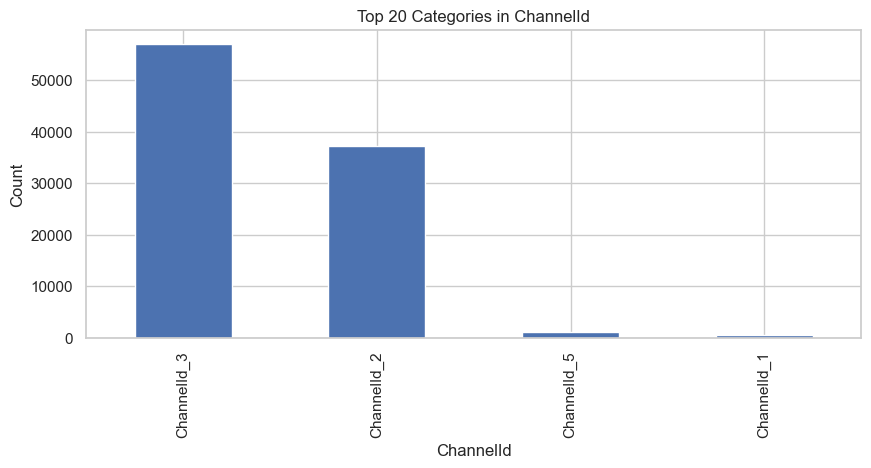

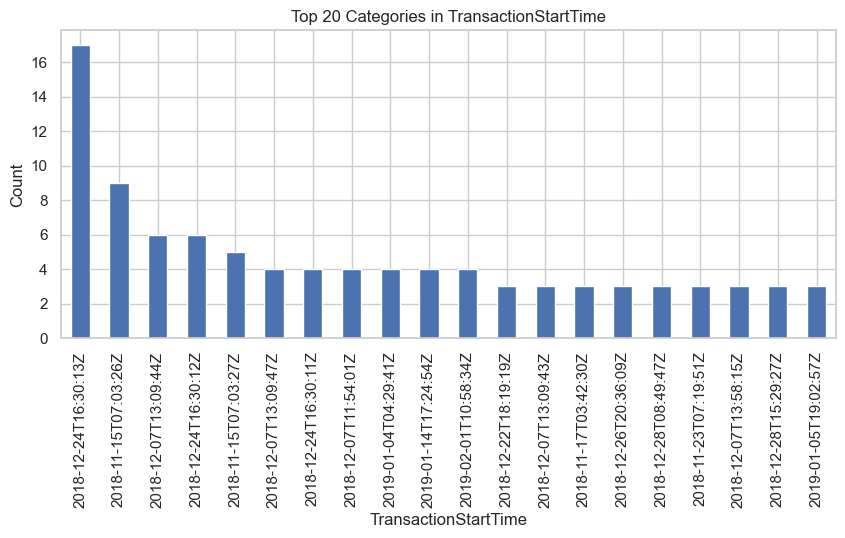

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top 20 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


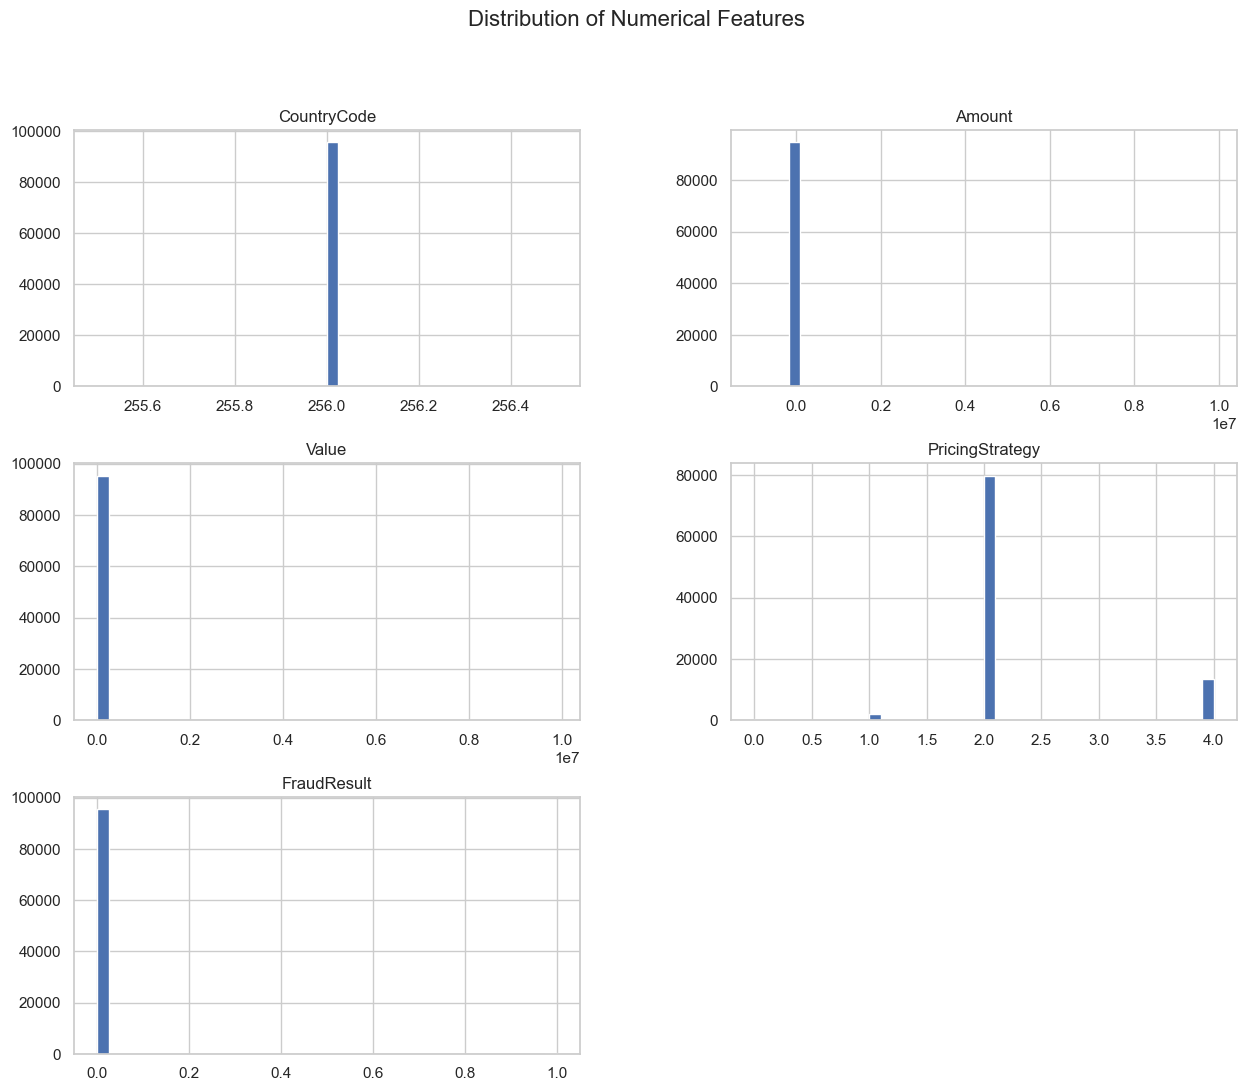

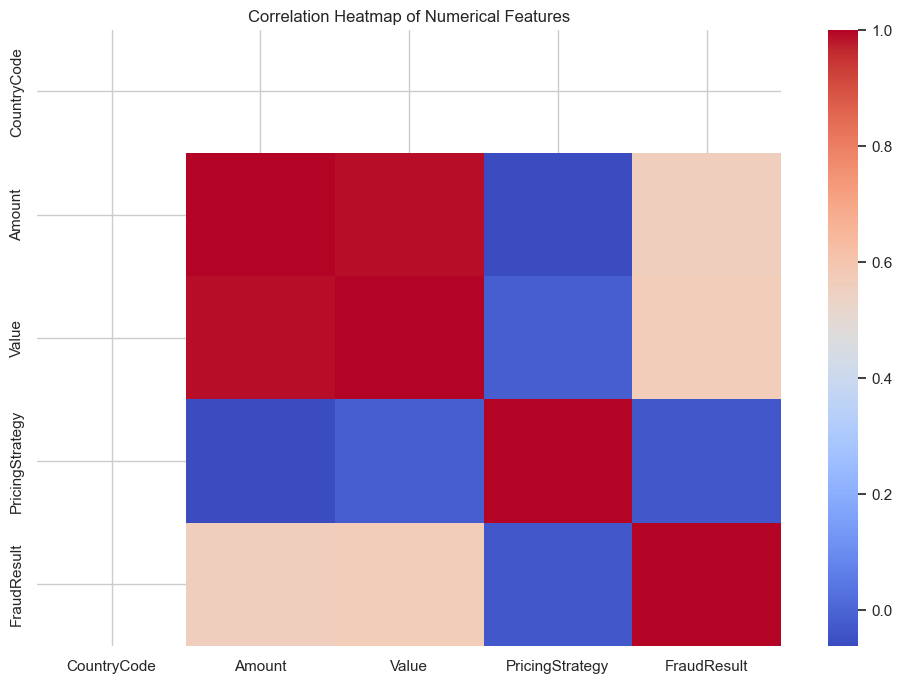

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


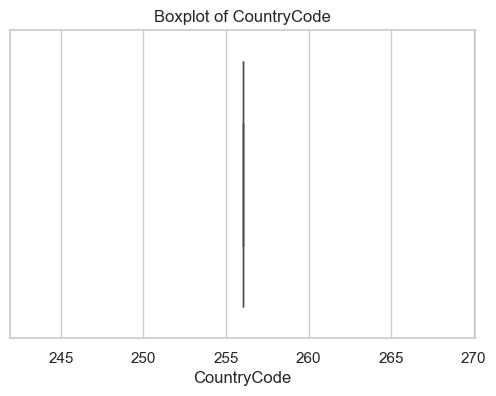

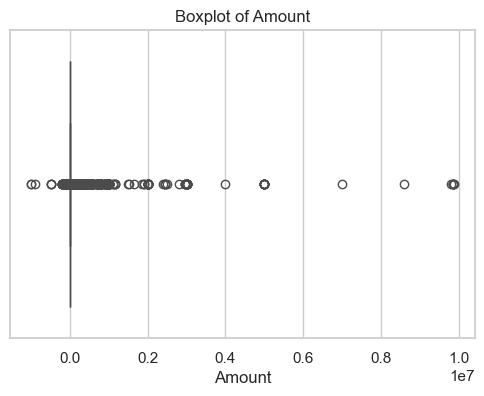

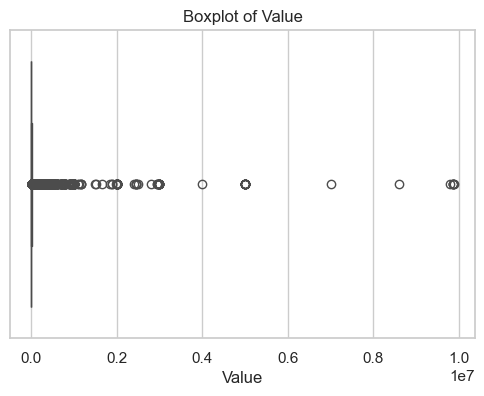

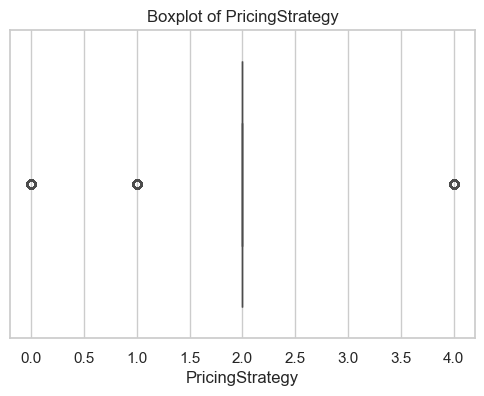

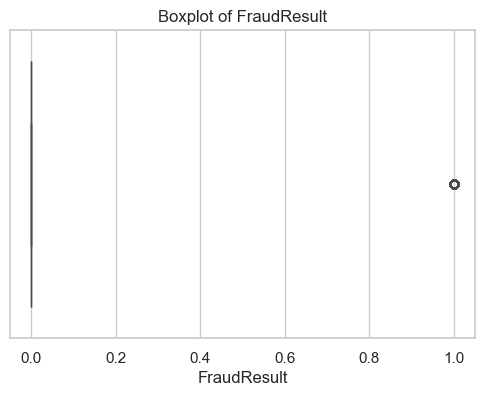

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [16]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"], errors="coerce")

df["TransactionStartTime"].head()


0   2018-11-15 02:18:49+00:00
1   2018-11-15 02:19:08+00:00
2   2018-11-15 02:44:21+00:00
3   2018-11-15 03:32:55+00:00
4   2018-11-15 03:34:21+00:00
Name: TransactionStartTime, dtype: datetime64[ns, UTC]

In [17]:
df["hour"] = df["TransactionStartTime"].dt.hour
df["day"] = df["TransactionStartTime"].dt.day
df["month"] = df["TransactionStartTime"].dt.month
df["year"] = df["TransactionStartTime"].dt.year

df[["hour", "day", "month", "year"]].head()


,hour,day,month,year
0,2,15,11,2018
1,2,15,11,2018
2,2,15,11,2018
3,3,15,11,2018
4,3,15,11,2018


Top Insights from EDA
1. Transaction amounts are heavily skewed

Most transactions are small, but a few very large payments exist.
This indicates the need for scaling or log transformation.

2. High-cardinality categorical features

ProductId, ProviderId, and SubscriptionId have thousands of unique values.
These should NOT be one-hot encoded — use label encoding or embeddings.

3. Missing data is present in important fields

ProductCategory and TransactionStartTime have missing values.
These must be handled carefully in the pipeline.

4. ChannelId distribution is unbalanced

Most customers use Android, while other channels have small representation.
This affects model ability to generalize across channels.

5. FraudResult is highly imbalanced

Very few fraudulent transactions exist.
This shows fraud is rare and not directly useful for risk proxy creation.

In [ ]:
# Task 3 — Feature Engineering Pipeline Test


In [18]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [19]:
from src.data_processing import build_feature_pipeline


In [20]:
import pandas as pd

df = pd.read_csv("../data/raw/data.csv")
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.00,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.00,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.00,644,2018-11-15T03:34:21Z,2,0


In [21]:
pipeline = build_feature_pipeline()

processed = pipeline.fit_transform(df)

processed[:5]


array([[-4.63711365e-02, -7.22910943e-02, -2.15552989e+00,
        -1.00738628e-01,  8.48684242e-01, -9.94246236e-01,
         1.70117936e-01, -6.76228545e-02, -1.67922332e-01,
        -3.11831009e-01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  2.00000000e+00],
       [-5.46432298e-02, -8.02507151e-02, -2.15552989e+00,
        -1.00738628e-01,  8.48684242e-01, -9.94246236e-01,
         1.70117936e-01, -6.76228545e-02, -1.67922332e-01,
        -3.11831009e-01,  0.00000000e+00,  0.00000000e+00,
         3.00000000e+00,  1.90000000e+01,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00],
       [-5.04260842e-02, -7.63521253e-02, -2.15552989e+00,
        -1.00738628e-01,  8.48684242e-01, -9.94246236e-01,
         1.65122119e-01, -7.25679638e-02, -2.01992394e-01,
        -4.44993397e-01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  2.0